In [ ]:
'''
This file calculates the beta of various S&P sector indices to S&P itself

'''

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycaret

# Yahoo finance
import yfinance as yf

# Datetime
import datetime as dt
from datetime import datetime

In [8]:
start=pd.to_datetime('1990-01-01', format='%Y-%m-%d')
today_date = datetime.today().strftime('%Y-%m-%d')
period=256

In [4]:
'''
S&P 500 (^GSPC)
CBOE Volatility Index (^VIX)

S&P 500 Materials (Sector) (^SP500-15)
S&P 500 Industrials (Sector) (^SP500-20)
S&P 500 Consumer Discretionary (^SP500-25)
S&P 500 Consumer Staples (Sector) (^SP500-30)
S&P 500 Health Care (Sector) (^SP500-35)
S&P 500 Financials (Sector) (^SP500-40)
S&P 500 Information Technology (^SP500-45)
S&P 500 Communication Services (^SP500-50)
S&P 500 Utilities (Sector) (^SP500-55)
S&P 500 Real Estate (Sector) (^SP500-60)
S&P 500 Energy (Sector) (^GSPE)

S&P 500 Energy (Industry Group) (^SP500-1010)
S&P 500 Energy (Sector) (TR) (^SP500-10TR)
S&P 500 Banks (Industry Group) (^SP500-4010)

The Materials Select Sector SPDR Fund (XLB)
The Industrial Select Sector SPDR Fund (XLI)
The Consumer Discretionary Select Sector SPDR Fund (XLY)
The Consumer Staples Select Sector SPDR Fund (XLP)
The Health Care Select Sector SPDR Fund (XLV)
The Utilities Select Sector SPDR Fund (XLU)
The Technology Select Sector SPDR Fund (XLK)
The Financial Select Sector SPDR Fund (XLF)
The Energy Select Sector SPDR Fund (XLE)
The Communication Services Select Sector SPDR Fund (XLC)
The Real Estate Select Sector SPDR Fund (XLRE)

SPDR S&P Homebuilders ETF (XHB)
SPDR S&P Retail ETF (XRT)
VanEck Semiconductor ETF (SMH)
SPDR S&P Metals and Mining ETF (XME)
SPDR S&P Biotech ETF (XBI)
'''

'\nCBOE Volatility Index (^VIX)\n\nS&P 500 Materials (Sector) (^SP500-15)\nS&P 500 Industrials (Sector) (^SP500-20)\nS&P 500 Consumer Discretionary (^SP500-25)\nS&P 500 Consumer Staples (Sector) (^SP500-30)\nS&P 500 Health Care (Sector) (^SP500-35)\nS&P 500 Financials (Sector) (^SP500-40)\nS&P 500 Information Technology (^SP500-45)\nS&P 500 Communication Services (^SP500-50)\nS&P 500 Utilities (Sector) (^SP500-55)\nS&P 500 Real Estate (Sector) (^SP500-60)\nS&P 500 Energy (Sector) (^GSPE)\n\nS&P 500 Energy (Industry Group) (^SP500-1010)\nS&P 500 Energy (Sector) (TR) (^SP500-10TR)\nS&P 500 Banks (Industry Group) (^SP500-4010)\n\nThe Materials Select Sector SPDR Fund (XLB)\nThe Industrial Select Sector SPDR Fund (XLI)\nThe Consumer Discretionary Select Sector SPDR Fund (XLY)\nThe Consumer Staples Select Sector SPDR Fund (XLP)\nThe Health Care Select Sector SPDR Fund (XLV)\nThe Utilities Select Sector SPDR Fund (XLU)\nThe Technology Select Sector SPDR Fund (XLK)\nThe Financial Select Secto

In [9]:
'''
#Download data for single indicator available on Yahoo Finance
ticker = "XLB"
df = yf.download(ticker,start,end=today_date)
'''

[*********************100%%**********************]  1 of 1 completed


In [11]:
#Download data for multiple indicators available on Yahoo Finance

yahoo_indicators = ['^GSPC','XLB','XLI','XLY','XLP','XLV','XLU','XLK','XLF','XLE','XLC','XLRE'] 
tickers = yf.Tickers(yahoo_indicators)
df = tickers.download(start=start,end=today_date,interval='1D',)
df

[*********************100%%**********************]  12 of 12 completed


Price      Capital Gains                                               ...  \
Ticker               XLB  XLC  XLE  XLF  XLI  XLK  XLP XLRE  XLU  XLV  ...   
Date                                                                   ...   
1990-01-02           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1990-01-03           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1990-01-04           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1990-01-05           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
1990-01-08           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2024-05-30           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2024-05-31           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2024-06-03           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2024-06-04           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2024-06-05           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

Price           Volume                                                 \
Ticker             XLE         XLF         XLI        XLK         XLP   
Date                                                                    
1990-01-02         NaN         NaN         NaN        NaN         NaN   
1990-01-03         NaN         NaN         NaN        NaN         NaN   
1990-01-04         NaN         NaN         NaN        NaN         NaN   
1990-01-05         NaN         NaN         NaN        NaN         NaN   
1990-01-08         NaN         NaN         NaN        NaN         NaN   
...                ...         ...         ...        ...         ...   
2024-05-30  11366400.0  32772600.0   7816300.0  5229900.0   7404400.0   
2024-05-31  16251500.0  38664000.0   9703500.0  6040500.0  11873900.0   
2024-06-03  20398300.0  37855000.0  15241000.0  4814000.0  12223400.0   
2024-06-04  17360700.0  27586400.0  10061500.0  3202700.0   9097500.0   
2024-06-05  10516800.0  23816100.0   8666000.0  4392900.0   9095100.0   

Price                                                                 
Ticker           XLRE         XLU         XLV        XLY       ^GSPC  
Date                                                                  
1990-01-02        NaN         NaN         NaN        NaN   162070000  
1990-01-03        NaN         NaN         NaN        NaN   192330000  
1990-01-04        NaN         NaN         NaN        NaN   177000000  
1990-01-05        NaN         NaN         NaN        NaN   158530000  
1990-01-08        NaN         NaN         NaN        NaN   140110000  
...               ...         ...         ...        ...         ...  
2024-05-30  5867800.0   9081100.0   7395500.0  2248300.0  3818750000  
2024-05-31  7949600.0  12388800.0   7945900.0  3420200.0  5437160000  
2024-06-03  5826300.0  18457900.0  10303300.0  3964500.0  4046920000  
2024-06-04  5647500.0  14709800.0   6964200.0  2889900.0  3707900000  
2024-06-05  4541200.0   8959700.0   5373400.0  2290900.0  3591460000  

[8673 rows x 95 columns]

In [13]:
#list(df.columns.levels[0])

['Capital Gains',
 'Close',
 'Dividends',
 'High',
 'Low',
 'Open',
 'Stock Splits',
 'Volume']

In [125]:
#We only need the Close
df1=df['Close']

In [126]:
#df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8673 entries, 1990-01-02 to 2024-06-05
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XLB     6404 non-null   float64
 1   XLC     1501 non-null   float64
 2   XLE     6404 non-null   float64
 3   XLF     6404 non-null   float64
 4   XLI     6404 non-null   float64
 5   XLK     6404 non-null   float64
 6   XLP     6404 non-null   float64
 7   XLRE    2179 non-null   float64
 8   XLU     6404 non-null   float64
 9   XLV     6404 non-null   float64
 10  XLY     6404 non-null   float64
 11  ^GSPC   8673 non-null   float64
dtypes: float64(12)
memory usage: 880.9 KB


In [127]:
#Rename the columns to the sector names
df1.rename(columns={"XLB": "Materials", "XLI": "Industrial", "XLY": "ConsDis", "XLP": "ConsSta","XLV": "Health", "XLU": "Utilities", "XLK": "Technology", "XLF": "Financial","XLE": "Energy", "XLC": "Communications", "XLRE": "Real Estate", "^GSPC": "SP500"},inplace=True)
#df1

Ticker,Materials,Communications,Energy,Financial,Industrial,Technology,ConsSta,Real Estate,Utilities,Health,ConsDis,SP500
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,359.690002
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,358.760010
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,355.670013
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.200012
1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,353.790009
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30,90.440002,82.379997,90.940002,41.040001,122.029999,209.830002,76.150002,37.310001,71.459999,141.630005,174.990005,5235.479980
2024-05-31,91.529999,83.260002,93.199997,41.639999,123.510002,210.160004,77.339996,38.049999,72.720001,143.699997,175.970001,5277.509766
2024-06-03,90.989998,83.589996,90.760002,41.380001,122.000000,210.690002,77.309998,37.900002,71.889999,144.710007,175.889999,5283.399902


In [128]:
#Calculate the daily returns
df2 = np.log(df1/df1.shift(1))

In [129]:
#df2

Ticker,Materials,Communications,Energy,Financial,Industrial,Technology,ConsSta,Real Estate,Utilities,Health,ConsDis,SP500
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002589
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008650
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009804
1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004504
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30,0.008104,-0.003272,0.002863,0.005375,0.006825,-0.023084,0.002630,0.014307,0.013383,0.000494,0.005903,-0.005993
2024-05-31,0.011980,0.010626,0.024548,0.014514,0.012055,0.001571,0.015506,0.019640,0.017479,0.014510,0.005585,0.007996
2024-06-03,-0.005917,0.003956,-0.026529,-0.006264,-0.012301,0.002519,-0.000388,-0.003950,-0.011479,0.007004,-0.000455,0.001115


In [130]:
#create a df3 to store the betas
#specify the lookback periods to calculate betas

#df2['beta']= np.nan  #used if want to calculate beta within df2
df3=df2.copy()


In [132]:
for j in range (df2.shape[1]-1):
    for i in range(1+period, len(df2)):
        try:
            s = df2.iloc[i-period:i,j] 
            m = df2.iloc[i-period:i,-1]  #check if SP500 is in last column or second last column of df2
            covariance = np.cov(s,m) 
            beta = covariance[0,1]/covariance[1,1]
            df3.iloc[i,j]= beta
        except IndexError:
            df3.iloc[i,j]= 0

In [ ]:
'''
#loop over a single column
for i in range(1+period, len(df2)):
    try:
        s = df2.iloc[i-period:i,0] 
        m = df2.iloc[i-period:i,-2]
        covariance = np.cov(s,m) 
        beta = covariance[0,1]/covariance[1,1]
        df2.iloc[i,-1]= beta
    except IndexError:
        df2.iloc[i,-1]= 0
'''

In [134]:
df3

Ticker,Materials,Communications,Energy,Financial,Industrial,Technology,ConsSta,Real Estate,Utilities,Health,ConsDis,SP500
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002589
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008650
1990-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009804
1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004504
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-30,0.858458,1.147161,0.425231,0.784402,0.883915,1.355579,0.453115,0.966412,0.511396,0.549636,1.279533,-0.005993
2024-05-31,0.846191,1.145638,0.436521,0.776438,0.875632,1.363744,0.448337,0.954829,0.504966,0.543291,1.277531,0.007996
2024-06-03,0.845717,1.148643,0.452177,0.775854,0.874091,1.360509,0.452881,0.952354,0.510327,0.546987,1.279265,0.001115


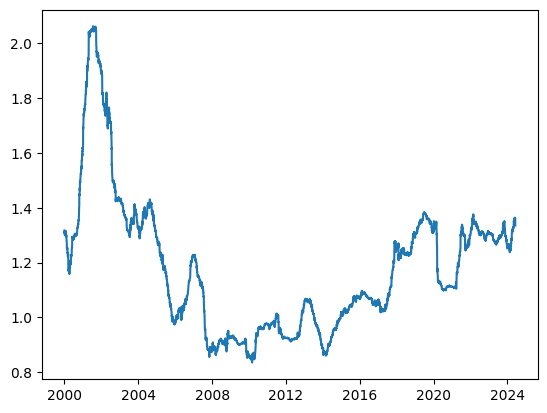

In [136]:
plt.plot(df3['Technology'])